### Fourier Transform drawings

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Load an image

In [2]:
img = cv2.imread("/home/said/Pictures/fat_bear.png")

In [3]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(imgray, (7, 7), 0)

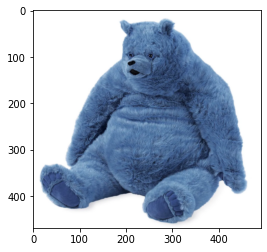

In [4]:
plt.imshow(img)

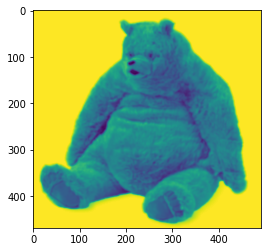

In [5]:
plt.imshow(blurred)

In [6]:
ret, thresh = cv2.threshold(imgray, 180, 255, 0)

Text(0.5, 1.0, 'Simple Thresholding')

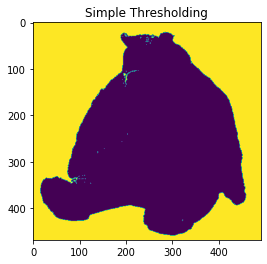

In [7]:
plt.imshow(thresh)
plt.title("Simple Thresholding")

In [33]:
(T, thresh) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

Text(0.5, 1.0, 'Otsu Thresholding')

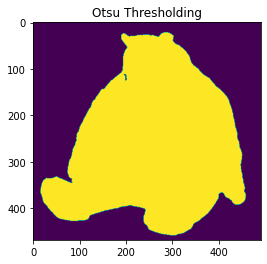

In [34]:
plt.imshow(thresh)
plt.title("Otsu Thresholding")

Text(0.5, 1.0, 'Mean Adaptive Thresholding')

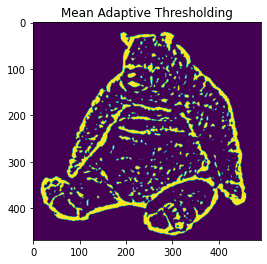

In [18]:
# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
plt.imshow(thresh)
plt.title("Mean Adaptive Thresholding")

Text(0.5, 1.0, 'Gaussian Adaptive Thresholding')

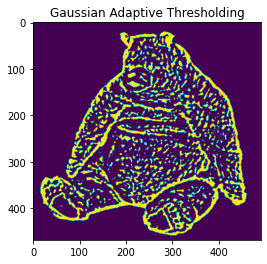

In [19]:
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
plt.imshow(thresh)
plt.title("Gaussian Adaptive Thresholding")

In [28]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

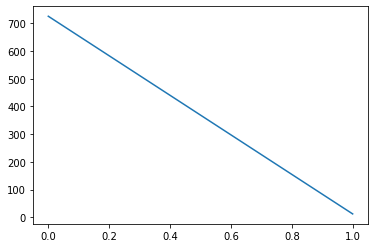

In [29]:
plt.plot([len(c) for c in sorted(contours, key=lambda x: -len(x))])

In [30]:
stacked_contours = np.vstack(sorted(contours, key=lambda x: -len(x)))

In [31]:
largest_contour_idx = np.argmax([len(c) for c in contours])

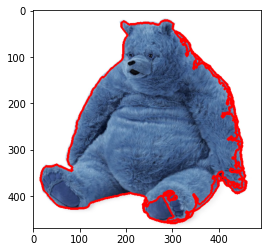

In [32]:
plt.imshow(cv2.drawContours(img, contours, largest_contour_idx, (255,0,0), 3))

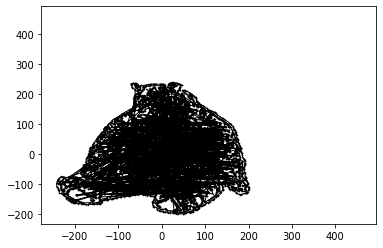

In [17]:
from matplotlib.path import Path
import matplotlib.patches as patches


verts = [ tuple(coord) for coord in stacked_contours.squeeze() ]

codes = [ Path.MOVETO ] + [ Path.MOVETO ] * (len(verts)-1)

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
xs = np.asarray(xs) - np.mean(xs)
ys = - np.asarray(ys) + np.mean(ys)

ax.plot(xs, ys, '.-', lw=1, color='black', ms=1)

plt.show()

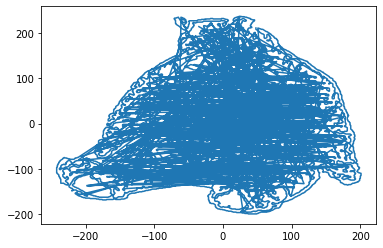

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs, ys)
plt.show()

In [19]:
from math import tau
t_list = np.linspace(0, tau, len(xs))

In [20]:
t_list

array([0.00000000e+00, 6.35499677e-04, 1.27099935e-03, ...,
       6.28191431e+00, 6.28254981e+00, 6.28318531e+00])

### Compute the Fourier coefficients

In [21]:
def f(t, t_list, xs, ys):
    return np.interp(t, t_list, xs + 1j*ys)

In [22]:
f(0, t_list, xs, ys)

(47.988875404530745+211.77680016181228j)

In [23]:
from scipy.integrate import quad_vec

#result = quad_vec(lambda x: f(x, ...), a_min, b_min)

def compute_cn(f, n):
    coef = 1/tau*quad_vec(
        lambda t: f(t, t_list, xs, ys)*np.exp(-n*t*1j), 
        0, 
        tau, 
        limit=100, 
        full_output=False)[0]
    return coef



In [24]:
N = 100
coefs = [ (compute_cn(f, 0), 0) ] + [ (compute_cn(f, j), j) for i in range(1, N+1) for j in (i, -i) ]

In [25]:
len(coefs)

201

In [26]:
def get_circle_coords(center, r, N=50):
    theta = np.linspace(0, tau, N)
    x, y = center[0] + r * np.cos(theta), center[1] + r * np.sin(theta)
    return x, y

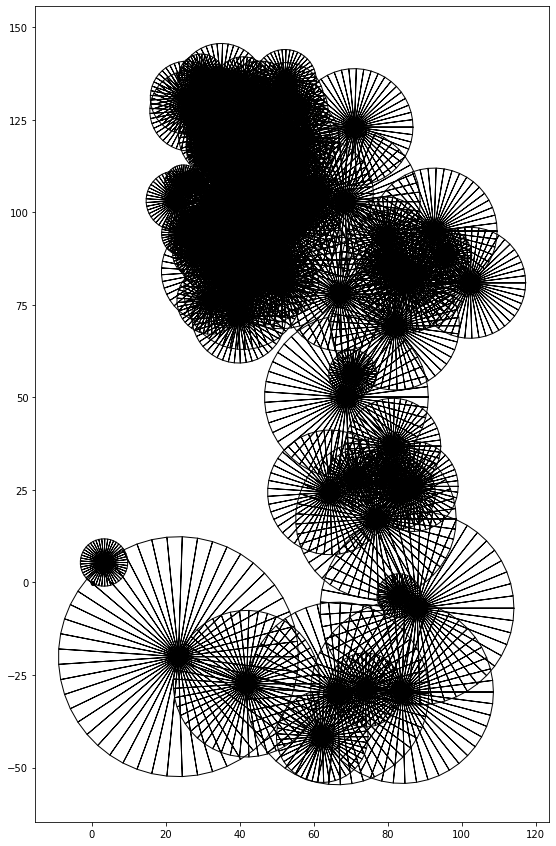

In [27]:
fig, ax = plt.subplots()
prev_center = (0, 0)
fig.set_size_inches(15, 15)

for elts in coefs :
    c, fr = elts
    center = (prev_center[0] + np.real(c), prev_center[1] + np.imag(c))
    x, y = get_circle_coords(center=center, r=np.linalg.norm(c), N=50)
    ax.set_aspect('equal', adjustable='box')
    ax.plot(x, y, '-', lw=1, color='black', ms=1)
    for xx,yy in zip(x, y):
        ax.arrow(center[0], center[1], xx-center[0], yy-center[1], head_width=0.005, head_length=0.001)
    prev_center = center


In [28]:
def get_next_pos(c, fr, t=0.1, drawing_time = 1):
    angle = (fr * tau * t) / drawing_time
    return c * np.exp(1j*angle)

In [77]:
a = 1 + 1j
b = get_next_pos(c=a, fr=1, t=0.1)

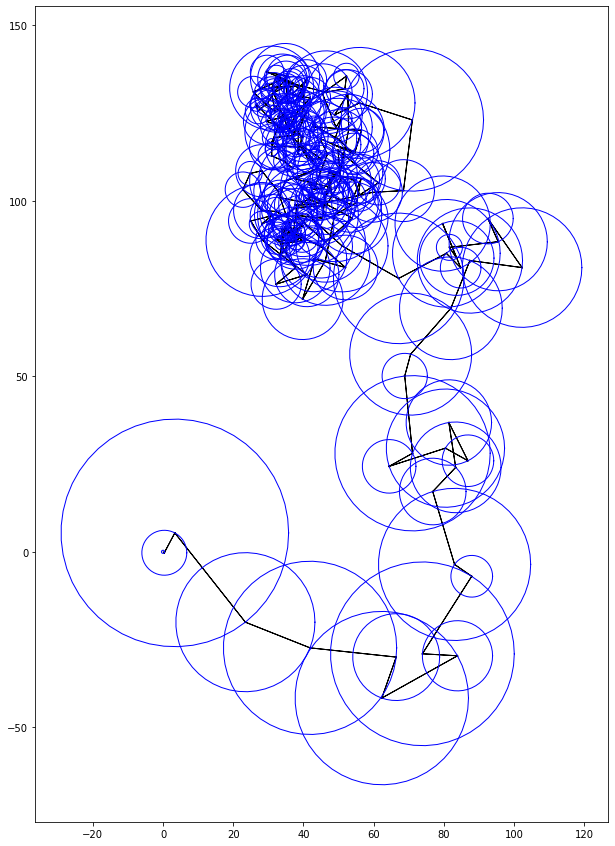

In [29]:
fig, ax = plt.subplots()
center = (0, 0)
fig.set_size_inches(15, 15)

for elts in coefs :
    c, fr = elts
    r = np.linalg.norm(c)
    
    x, y = get_circle_coords(center=center, r=r, N=50)
    ax.plot(x, y, '-', lw=1, color='blue', ms=1)
    ax.set_aspect('equal')
    ax.arrow(center[0], center[1], np.real(c), np.imag(c), head_width=0.5, head_length=0.1)

    center = (center[0] + np.real(c), center[1] + np.imag(c))

In [35]:
N = 500
coefs = [ (compute_cn(f, 0), 0) ] + [ (compute_cn(f, j), j) for i in range(1, N+1) for j in (i, -i) ]

In [36]:
import matplotlib.animation as animation
   
# creating a blank window
# for the animation 

fig, ax = plt.subplots()

circles = [ax.plot([], [], 'b-')[0] for i in range(-N, N+1)]
circle_lines = [ax.plot([], [], 'g-')[0] for i in range(-N, N+1)]
drawing, = ax.plot([], [], 'r-', linewidth=2)

# to fix the size of figure so that the figure does not get cropped/trimmed
ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)

ax.set_axis_off()
ax.set_aspect('equal')

fig.set_size_inches(15, 15)
   
# initializing empty values
# for x and y co-ordinates
draw_x, draw_y = [], []
   
# animation function 
def animate(i, coefs, time): 
    # t is a parameter which varies
    # with the frame number
    t = time[i]
    
    coefs = [ (get_next_pos(c, fr, t=t), fr) for c, fr in coefs ]
    center = (0, 0)
    #print(f"frame : {i}")
    for i, elts in enumerate(coefs) :
        c, fr = elts
        r = np.linalg.norm(c)
        #print(f"coef : {c} --- r  : {r} --- theta : {np.angle(c)}")
        x, y = get_circle_coords(center=center, r=r, N=50)
        circle_lines[i].set_data([center[0], center[0]+np.real(c)], [center[1], center[1]+np.imag(c)])
        circles[i].set_data(x, y) 
        center = (center[0] + np.real(c), center[1] + np.imag(c))
    
    # center points now are points from last circle
    # these points are used as drawing points
    draw_x.append(center[0])
    draw_y.append(center[1])

    # draw the curve from last point
    drawing.set_data(draw_x, draw_y)
   
# calling the animation function 
drawing_time = 1
frames = N
time = np.linspace(0, drawing_time, num=frames)    
anim = animation.FuncAnimation(fig, animate, frames = frames, interval = 5, fargs=(coefs, time)) 
   
# saves the animation in our desktop
anim.save('fat_bear.gif', writer = 'PillowWriter', fps = 15)

MovieWriter PillowWriter unavailable; using Pillow instead.


: 

: 

In [ ]:
len(coefs), len(circles)

(101, 101)

In [ ]:
! jupyter nbconvert --to script fourier-draw.ipynb --no-prompt

[NbConvertApp] Converting notebook fourier-draw.ipynb to script
[NbConvertApp] Writing 5190 bytes to fourier-draw.py
